In [1]:
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

# Confidence Intervals

## Another Example: Mean Maternal Age

In [2]:
# This time we have a sample, but no population data!
births = Table.read_table('baby.csv')
births.show(5)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False


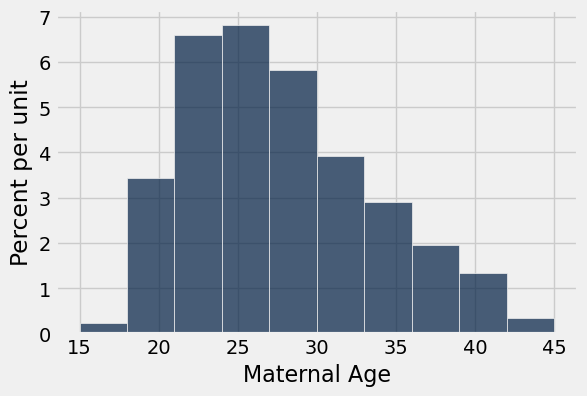

In [3]:
# sample distribution

births.hist('Maternal Age')

In [5]:
# sample mean maternal age

mean_age = np.mean(births.column('Maternal Age'))
mean_age

27.228279386712096

In [6]:
# samples with replacement from our sample
# returns the mean maternal age of this bootstrap sample

def one_bootstrap_mean():
    return np.mean(births.sample().column('Maternal Age'))

In [7]:
bootstrap_means = make_array()

for i in np.arange(1000):
    new_mean = one_bootstrap_mean()
    bootstrap_means = np.append(bootstrap_means, new_mean)

# Determine the bounds for the middle 95% of bootstrap sample mean maternal ages
    
left = percentile(2.5, bootstrap_means)
right = percentile(97.5, bootstrap_means)

We have 95% confidence that the mean maternal age is in the interval from 26.885 to 27.559 years old.


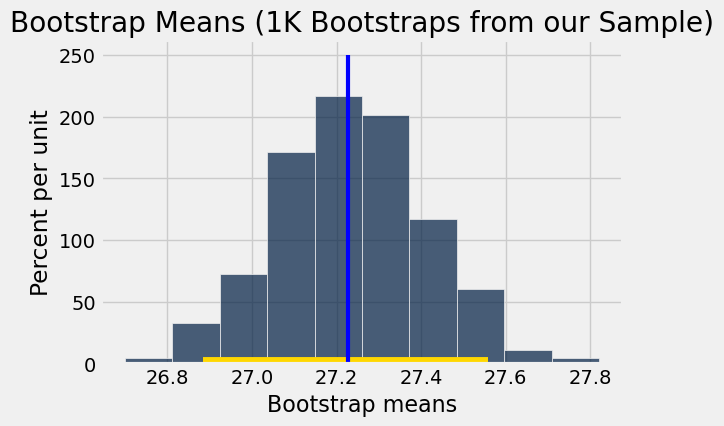

In [8]:
Table().with_column('Bootstrap means', bootstrap_means).hist()

plots.plot([left,right], [0,0], color="gold", lw=10, zorder=1);
plots.plot([mean_age,mean_age], [0,2.5], color="blue", lw=3, zorder=1);
plots.title('Bootstrap Means (1K Bootstraps from our Sample)');

print("We have 95% confidence that the mean maternal age is in the interval from", 
      np.round(left, 3),
      "to",
      np.round(right, 3),
      'years old.'
     )

## Back to an example with population data

In [9]:
united = Table.read_table('united.csv')
pop_median = np.median(united.column('Delay'))

our_sample = united.sample(100, with_replacement=False)
our_sample_median = np.median(our_sample.column('Delay'))

pop_median, our_sample_median

(2.0, 4.0)

In [10]:
def one_bootstrap_median():
    single_sample = our_sample.sample()
    return np.median(single_sample.column('Delay'))

bootstrap_medians = make_array()

for i in np.arange(1000):
    new_median = one_bootstrap_median()
    bootstrap_medians = np.append(bootstrap_medians, new_median)

left = percentile(2.5, bootstrap_medians)
right = percentile(97.5, bootstrap_medians)

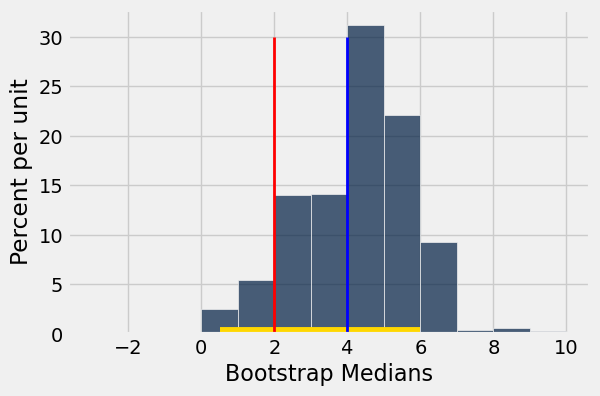

In [11]:
sampling_bins = np.arange(-3, 11, 1)    
    
Table().with_column(
    'Bootstrap Medians', bootstrap_medians
).hist('Bootstrap Medians', bins = sampling_bins)

plots.plot([left, right], [0,0], color="gold",lw=10, zorder=1);
plots.plot([pop_median, pop_median], [0,0.3], color="red",lw=2, zorder=1);
plots.plot([our_sample_median, our_sample_median], [0,0.3], color="blue",lw=2, zorder=1);

## Simulation of Simulations

In [12]:
left_ends = make_array()
right_ends = make_array()

total_delays = united.select('Delay')

def bootstrap_median(original_sample, label, replications):
    """Returns an array of bootstrapped sample medians:
    original_sample: table containing the original sample
    label: label of column containing the variable
    replications: number of bootstrap samples
    """
    just_one_column = original_sample.select(label)
    medians = make_array()
    for i in np.arange(replications):
        bootstrap_sample = just_one_column.sample()
        resampled_median = percentile(50, bootstrap_sample.column(0))
        medians = np.append(medians, resampled_median)
        
    return medians

In [13]:
# Generate 100 intervals, in the table intervals

for i in np.arange(100):
    first_sample = total_delays.sample(100, with_replacement=False)
    medians = bootstrap_median(first_sample, 'Delay', 1000)
    left_ends = np.append(left_ends, percentile(2.5, medians))
    right_ends = np.append(right_ends, percentile(97.5, medians))

intervals = Table().with_columns(
    'Left', left_ends,
    'Right', right_ends
)   

In [14]:
intervals

Left,Right
0,5
1,5
1,8
0,6
-1,4
-2,2
-2,4
0,8
-1,5
2,7


In [15]:
# transposes table and labels columns by replication
replication_number = np.ndarray.astype(np.arange(1, 101), str)
intervals2 = Table(replication_number).with_rows(make_array(left_ends, right_ends))
intervals2 

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,1,1,0,-1,-2,-2,0,-1,2,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,1,-1,-1,1,0,-1,-1,0,-1,-1,-1,-1,0,0,0,1,0,0,-1,1,1,0,-1,0,2,0,0,0,1,-1,-1,-1,2,0,-1,0,1,2,1,2,1,-1,0,0,1,0,-1,-1,0,0,0,1,-1,1,1,0,0,0,0,0,-1,-1,0,3,1,-1,1,0,0,0,0,0,0,0,-1
5,5,8,6,4,2,4,8,5,7,6,5,4,5,6,5,6,8,7,3,5,9,7,9,6,7,5,2,5,6,4,7,8,3,4,5,1,4,11,5,5,8,5,4,9,4,4,3,8,11,3,5,4,4,4,3,4,5,4,2,6,6,11,6,8,6,4,5,6,9,4,4,4,4,12,5,8,4,11,9,6,5,4,6,4,5,4,6,8,6,4,6,7,5,5,7,7,9,6,4


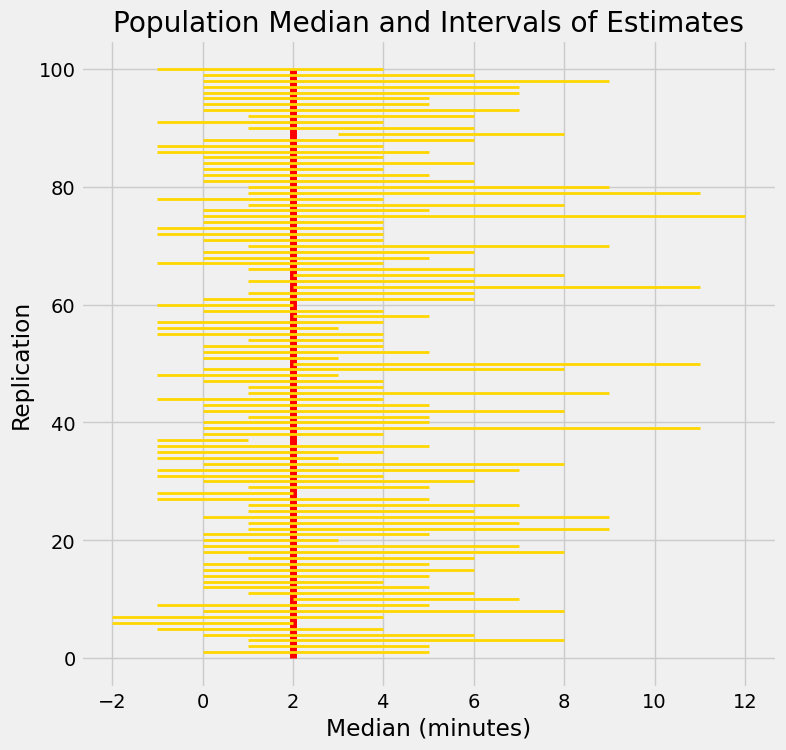

In [16]:
# makes the the plot bigger
plots.figure(figsize=(8,8))

#plot 100 intervals on one plot
for i in np.arange(100):
    ends = intervals2.column(i)
    plots.plot(ends, make_array(i+1, i+1), color='gold', lw=2, zorder=2)
    
plots.plot([pop_median, pop_median], make_array(0, 100), color='red', lw=5, zorder=1)
plots.xlabel('Median (minutes)')
plots.ylabel('Replication')
plots.title('Population Median and Intervals of Estimates');